<a href="https://colab.research.google.com/github/TangNgheQuangHuy/TangNgheQuangHuy/blob/main/NASA_Bearing_dataset_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set No. 1:
Recording Duration: October 22, 2003 12:06:24 to November 25, 2003 23:39:56
No. of Files: 2,156
No. of Channels: 8
Channel Arrangement: Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4; Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.
File Recording Interval: Every 10 minutes (except the first 43 files were taken every 5 minutes)
File Format: ASCII
Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.

Set No. 2:
Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39
No. of Files: 984
No. of Channels: 4
Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.
File Recording Interval: Every 10 minutes
File Format: ASCII
Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.

Set No. 3
Recording Duration: March 4, 2004 09:27:46 to April 4, 2004 19:01:57
No. of Files: 4,448
No. of Channels: 4
Channel Arrangement: Bearing1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing4 – Ch4;
File Recording Interval: Every 10 minutes
File Format: ASCII
Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 3.

In [3]:
from dataclasses import dataclass
from datetime import datetime
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
@dataclass(frozen=True) #biểu diễn một bộ dữ liệu với các thuộc tính như 'path'(đường dẫn), 'channel_names' và 'first_ts'(thời điểm đánh dấu thời gian bắt đầu)
class Dataset:
    path: Path
    channel_names: dict
    first_ts: pd.Timestamp

# Dưới đây là tạo một đối tượng set_no_1 từ class Dataset với các thông số cụ thể, bao gồm đường dẫn, tên kênh và thời điểm đầu tiên.
set_no_1 = Dataset(
    path=Path("/content/drive/MyDrive/Data test/1st_test"),
    channel_names={
        0: "B1x",
        1: "B1y",
        2: "B2x",
        3: "B2y",
        4: "B3x",
        5: "B3y",
        6: "B4x",
        7: "B4y",
    },
    first_ts=pd.to_datetime("2003-10-22 12:06:24"),
)

set_no_2 = Dataset(
    path=Path("/content/drive/MyDrive/Data test/2nd_test"),
    channel_names={
        0: "B1x",
        1: "B2x",
        2: "B3x",
        3: "B4x",
    },
    first_ts=pd.to_datetime("2004-02-12 10:32:39"),
)

set_no_3 = Dataset(
    path=Path("/content/drive/MyDrive/Data test/3rd_test/4th_test/txt"),
    channel_names={
        0: "B1x",
        1: "B2x",
        2: "B3x",
        3: "B4x",
    },
    first_ts=pd.to_datetime("2004-03-04 09:27:46"),
)


def read_dataset(dataset: Dataset): #Hàm read_dataset đọc và xử lý bộ dữ liệu từ đối tượng Dataset
    all_dfs = []
    for file_counter, f in enumerate(tqdm(sorted(dataset.path.iterdir()))):
        df = pd.read_csv(f, sep="\t", header=None, dtype=np.float32).rename(
            columns=dataset.channel_names
        )[["B1x", "B2x", "B3x", "B4x"]]
        ts = pd.to_datetime(f.name, format="%Y.%m.%d.%H.%M.%S")
        measurement_delta = (ts - dataset.first_ts).total_seconds()
        step_s = 1 / 20000  # 20 kHz sampling
        df["time"] = measurement_delta + np.arange(len(df)) * step_s
        df["measurement_id"] = file_counter
        df["measurement_id"] = df["measurement_id"].astype(np.uint32)
        if len(df) != 20480:
            raise RuntimeError(f"Unexpected file length {len(df)} in {f}")
        all_dfs.append(df)

    return pd.concat(all_dfs, ignore_index=True)
    #Đọc từng tệp CSV, đổi tên cột theo channel_names, thêm cột time và measurement_id và sau đó kết hợp tất cả các DataFrame thành một DataFrame lớn.

In [6]:
 #đọc và xử lý bộ dữ liệu từ thư mục được định nghĩa trong set_no_1. Kết quả được lưu vào biến raw_data_set_no_1.
raw_data_set_no_1 = read_dataset(set_no_1)
raw_data_set_no_1


100%|██████████| 2156/2156 [01:37<00:00, 22.20it/s]


,B1x,B2x,B3x,B4x,time,measurement_id
0,-0.022,-0.183,-0.105,-0.129,0.000000e+00,0
1,-0.105,-0.164,-0.049,-0.115,5.000000e-05,0
2,-0.183,-0.195,-0.005,-0.171,1.000000e-04,0
3,-0.178,-0.159,-0.100,-0.112,1.500000e-04,0
4,-0.208,-0.261,-0.151,-0.063,2.000000e-04,0
...,...,...,...,...,...,...
44154875,-0.168,-0.449,0.117,-0.037,2.979213e+06,2155
44154876,-0.112,-0.493,-0.266,-0.339,2.979213e+06,2155
44154877,-0.081,-0.325,-0.112,-0.300,2.979213e+06,2155
44154878,-0.115,-0.190,0.813,-0.205,2.979213e+06,2155


In [7]:
selected_columns = ["B1x", "B2x", "B3x", "B4x"]
selected_data = raw_data_set_no_1[selected_columns]
description_statistics = selected_data.describe()

print(description_statistics)


                B1x           B2x           B3x           B4x
count  4.415488e+07  4.415488e+07  4.415488e+07  4.415488e+07
mean  -1.159465e-01 -1.157602e-01 -1.127606e-01 -1.128492e-01
std    9.888998e-02  9.482668e-02  1.181106e-01  9.633911e-02
min   -1.042000e+00 -9.910000e-01 -5.000000e+00 -3.975000e+00
25%   -1.780000e-01 -1.780000e-01 -1.860000e-01 -1.660000e-01
50%   -1.150000e-01 -1.150000e-01 -1.120000e-01 -1.120000e-01
75%   -5.400000e-02 -5.100000e-02 -3.900000e-02 -6.100000e-02
max    7.010000e-01  7.280000e-01  4.998000e+00  3.938000e+00


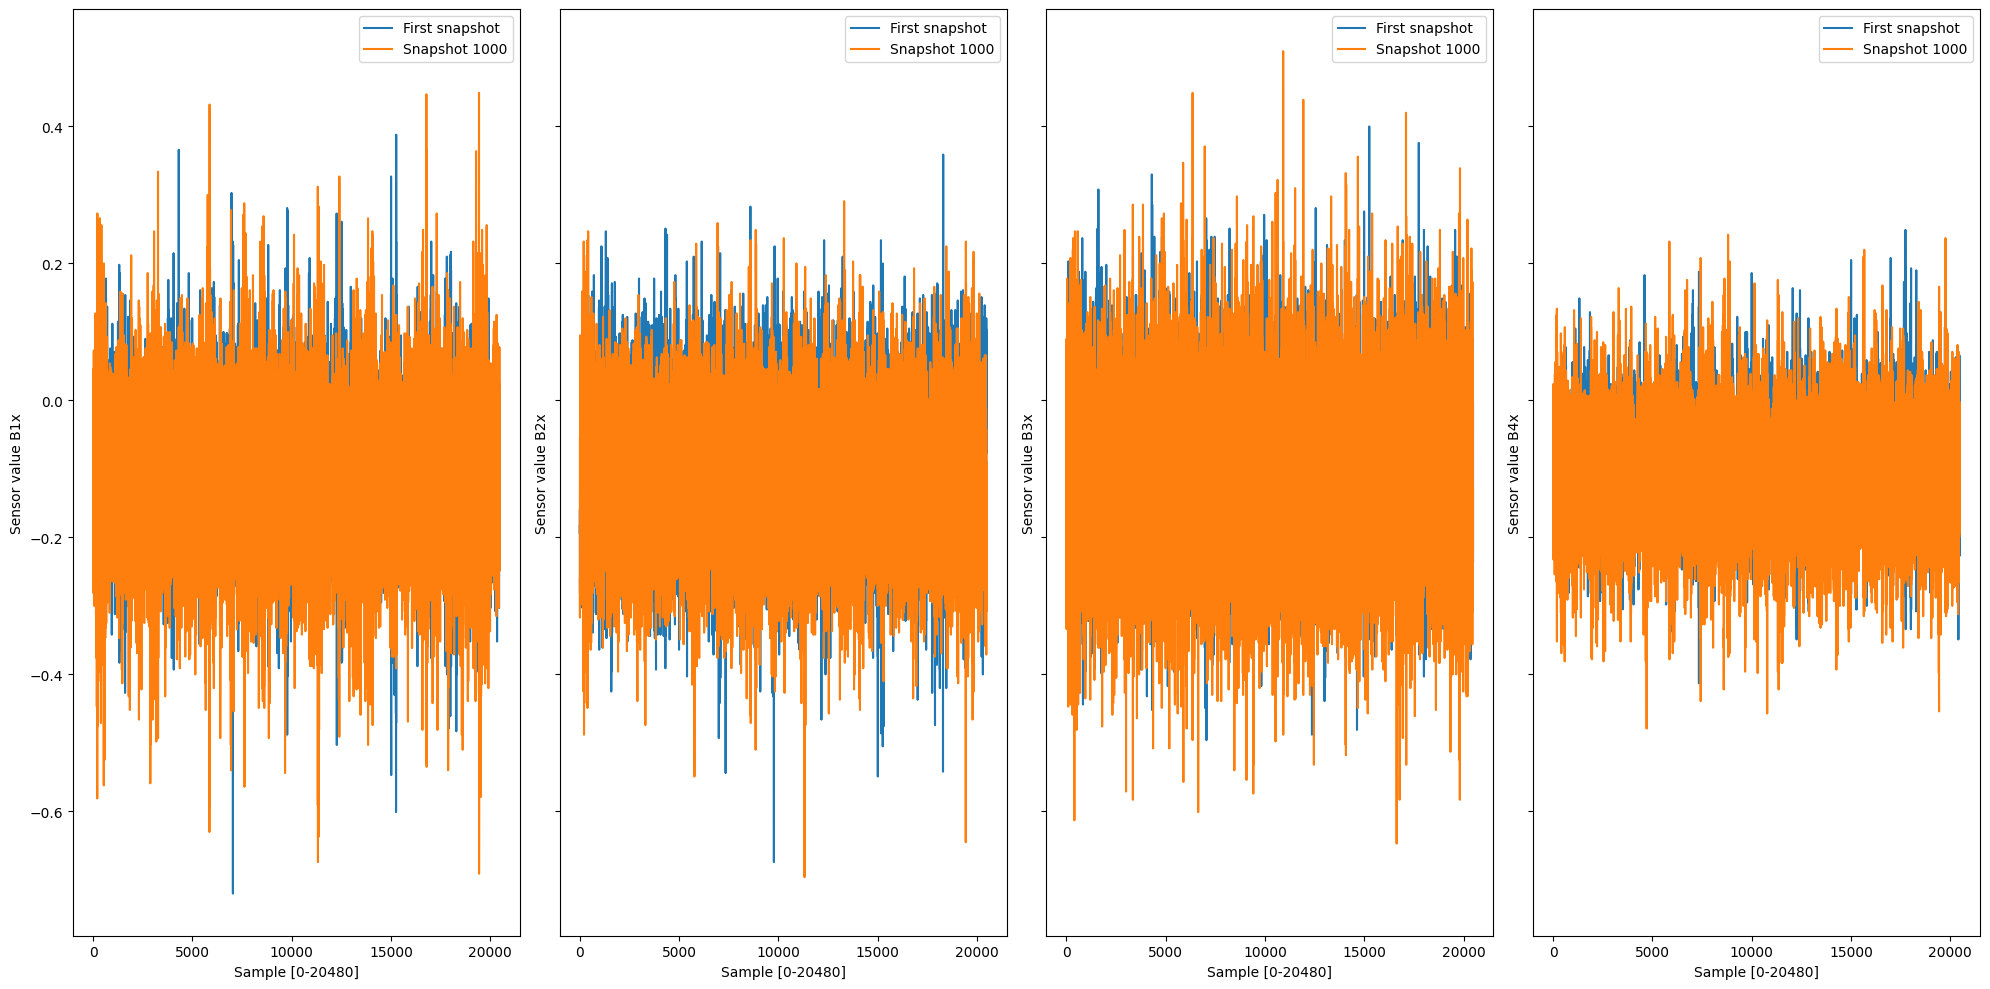

In [8]:
import matplotlib.pyplot as plt

# Show two different snapshot
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = np.arange(20480)

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    snapshot_0_values = raw_data_set_no_1.query("measurement_id == 0")[sensor]
    snapshot_1000_values = raw_data_set_no_1.query("measurement_id == 1000")[sensor]
    # Tạo các biến snapshot_0_values và snapshot_1000_values để lưu trữ giá trị của cảm biến tương ứng cho hai "snapshot" khác nhau.
    ax.plot(x, snapshot_0_values, label="First snapshot") # Vẽ đồ thị cho 2 snapshot
    ax.plot(x, snapshot_1000_values, label="Snapshot 1000")

    ax.set_ylabel(f"Sensor value {sensor}")
    ax.set_xlabel("Sample [0-20480]")
    ax.legend()

plt.tight_layout()
plt.show()


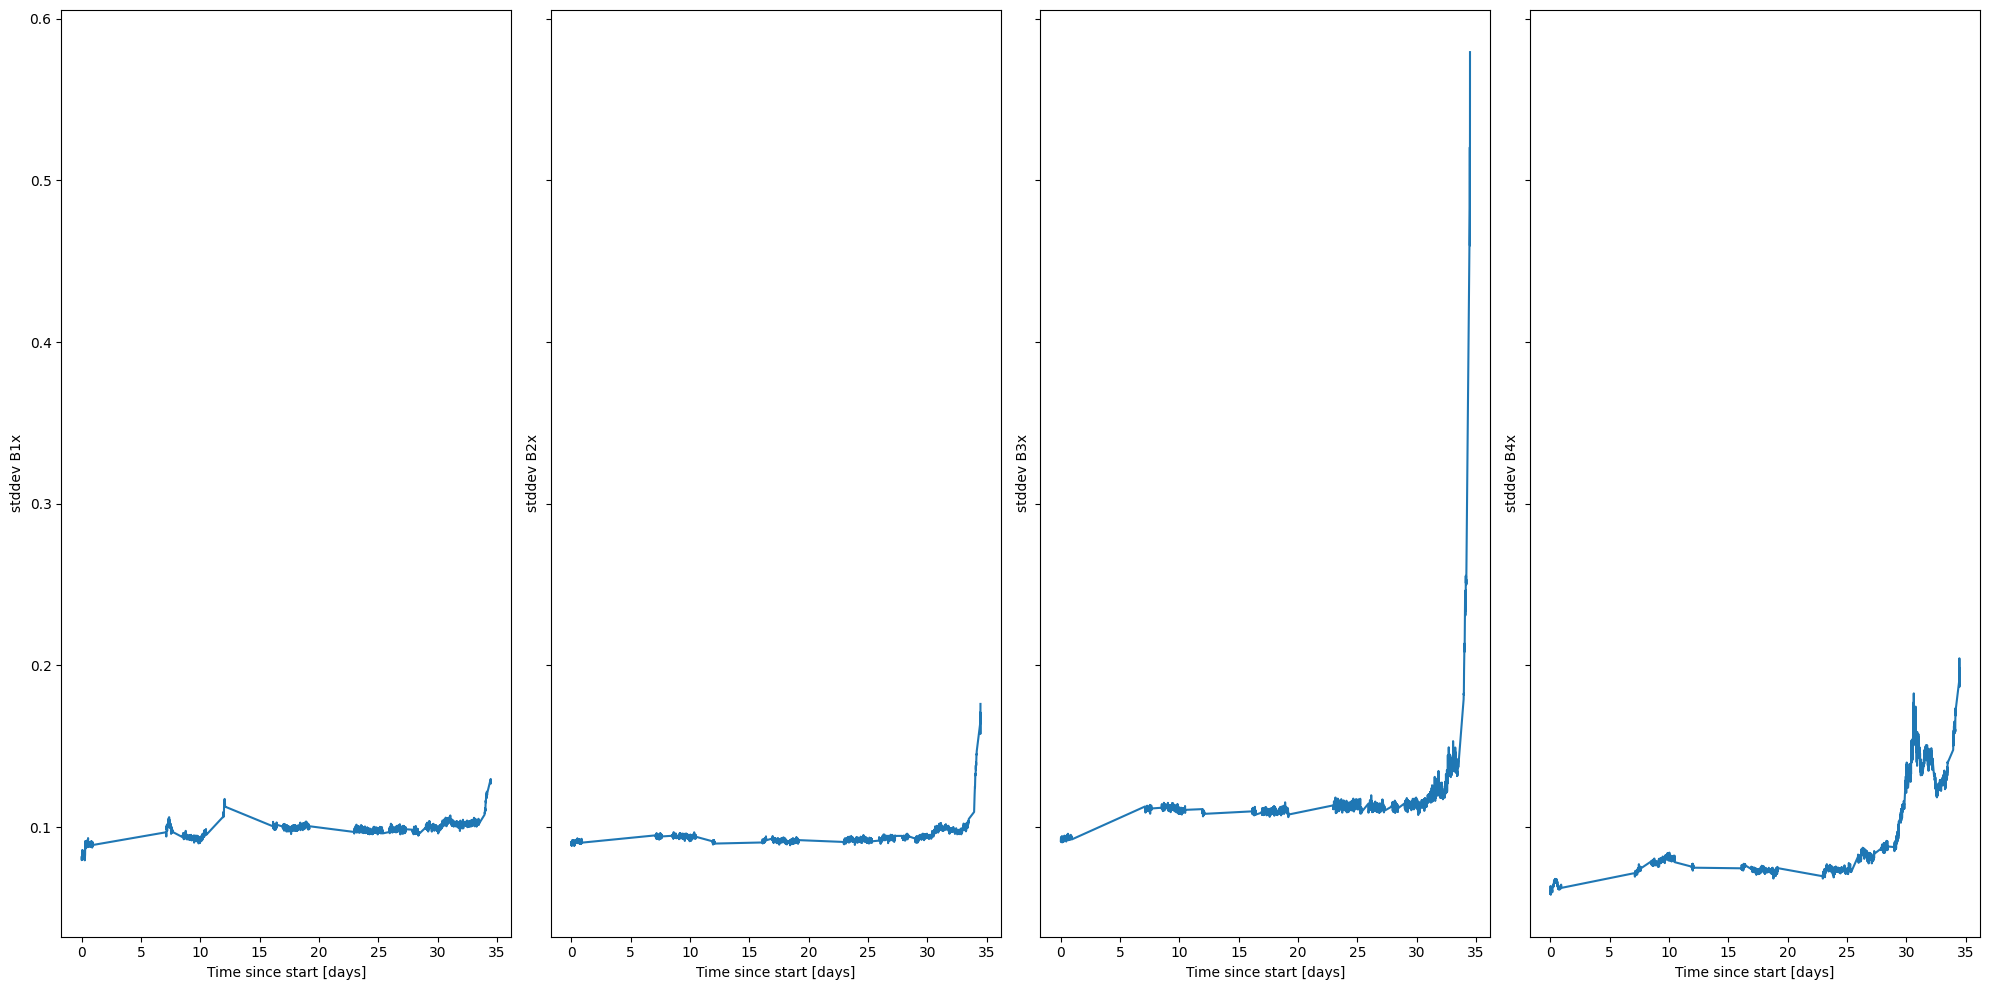

In [10]:
#Show RMS over entire experiment
#vẽ biểu đồ RMS tổng hợp trên mỗi ảnh chụp nhanh 1 giây trong toàn bộ khoảng thời gian của Bộ số 1.
# Assuming 'raw_data_set_no_1' contains your dataset

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = raw_data_set_no_1.groupby("measurement_id")["time"].head(1) / (3600 * 24) #lấy thời điểm đầu tiên của mỗi "measurement_id" và chuyển đổi sang đơn vị ngày.

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = raw_data_set_no_1.groupby("measurement_id")[sensor].std(ddof=0)
    ax.plot(x, y)
    ax.set_ylabel(f"stddev {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()


Số đọc cảm biến tăng lên ở cuối đối với cảm biến 1 và 2 có thể là do rung động gián tiếp đến từ ổ trục 3 đang tăng vọt.

In [11]:
#Use Set No 1 for deciding a threshold
# Thử tạo ra một ngưỡng có ý nghĩa dựa trên trạng thái chịu lực thông thường
num_train_measurements = (
    raw_data_set_no_1.groupby("measurement_id")["time"].first().gt(3600 * 24 * 25).idxmax()
)
print("First measurement ID after 25 days:", num_train_measurements)

sensor_cols = ["B1x", "B2x", "B3x", "B4x"]

train_data = raw_data_set_no_1.query("measurement_id < @num_train_measurements")


First measurement ID after 25 days: 1185


In [12]:
# Find a single set of data input normalization parameters
#Thực hiện quá trình normalization của dữ liệu huấn luyện bằng cách trừ đi giá trị trung bình và chia cho độ lệch chuẩn của từng cảm biến.
training_mean = train_data[sensor_cols].values.flatten().mean()
training_std = train_data[sensor_cols].values.flatten().std()

train_data.loc[:, sensor_cols] = (
    train_data[sensor_cols] - training_mean
) / training_std

Maximum std dev during 25 first days: 1.2562844478067787


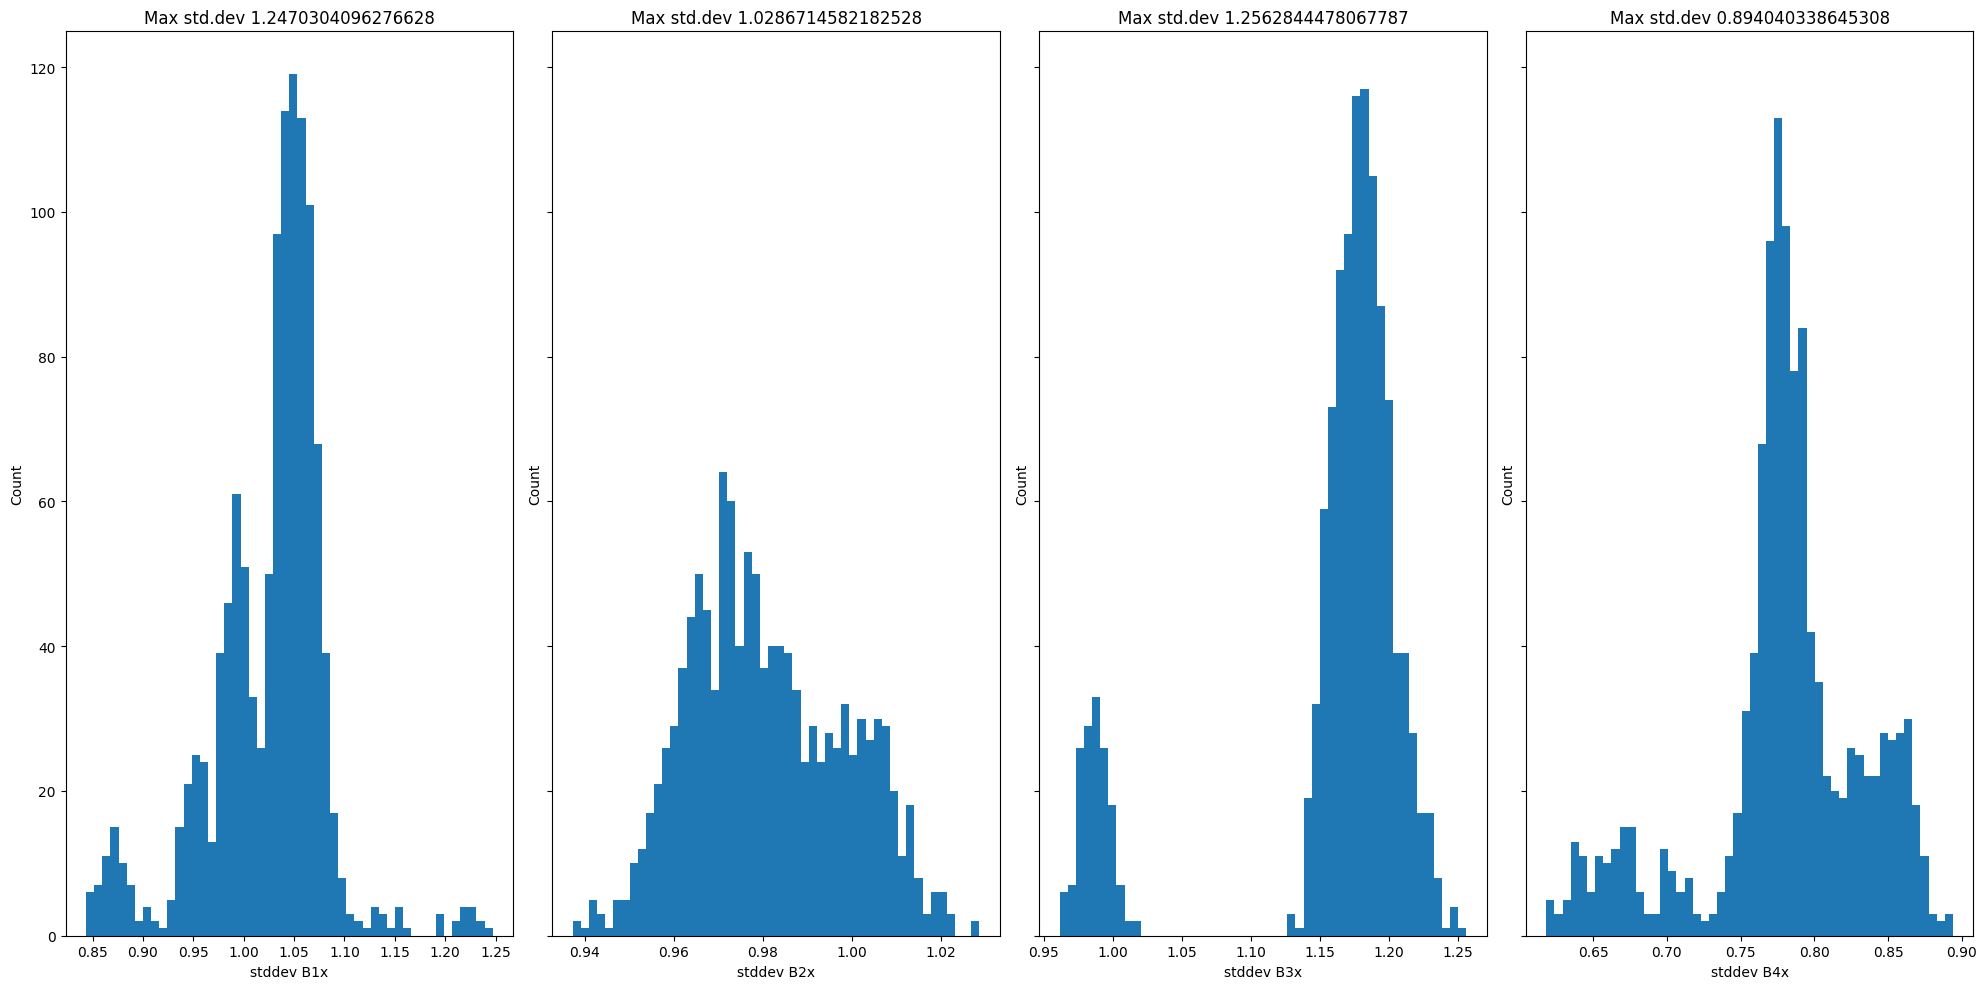

In [13]:
#Tạo ra một lưới subplot với 4 cột (tương ứng với 4 cảm biến) và 1 dòng, chia sẻ trục y (sharey=True) và kích thước tổng cả lưới là (20, 10).
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
stddev_threshold = 0.0
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = train_data.groupby("measurement_id")[sensor].std(ddof=0)
    ax.hist(y, bins=50)
    ax.set_ylabel("Count")
    ax.set_xlabel(f"stddev {sensor}")
    ax.set_title(f"Max std.dev {np.max(y)}")
    stddev_threshold = max(stddev_threshold, np.max(y))
print(f"Maximum std dev during 25 first days: {stddev_threshold}")
plt.tight_layout()
plt.show()


Experiment duration [days] 34.481632221643515
Sensor B1x first three outliers at [days]: [34.07023148 34.08412037 34.09106481]
Sensor B2x first three outliers at [days]: [33.97300926 33.9799537  33.98689815]
Sensor B3x first three outliers at [days]: [26.15701389 30.91703704 30.95175926]
Sensor B4x first three outliers at [days]: [29.93260417 29.93902778 29.94597222]


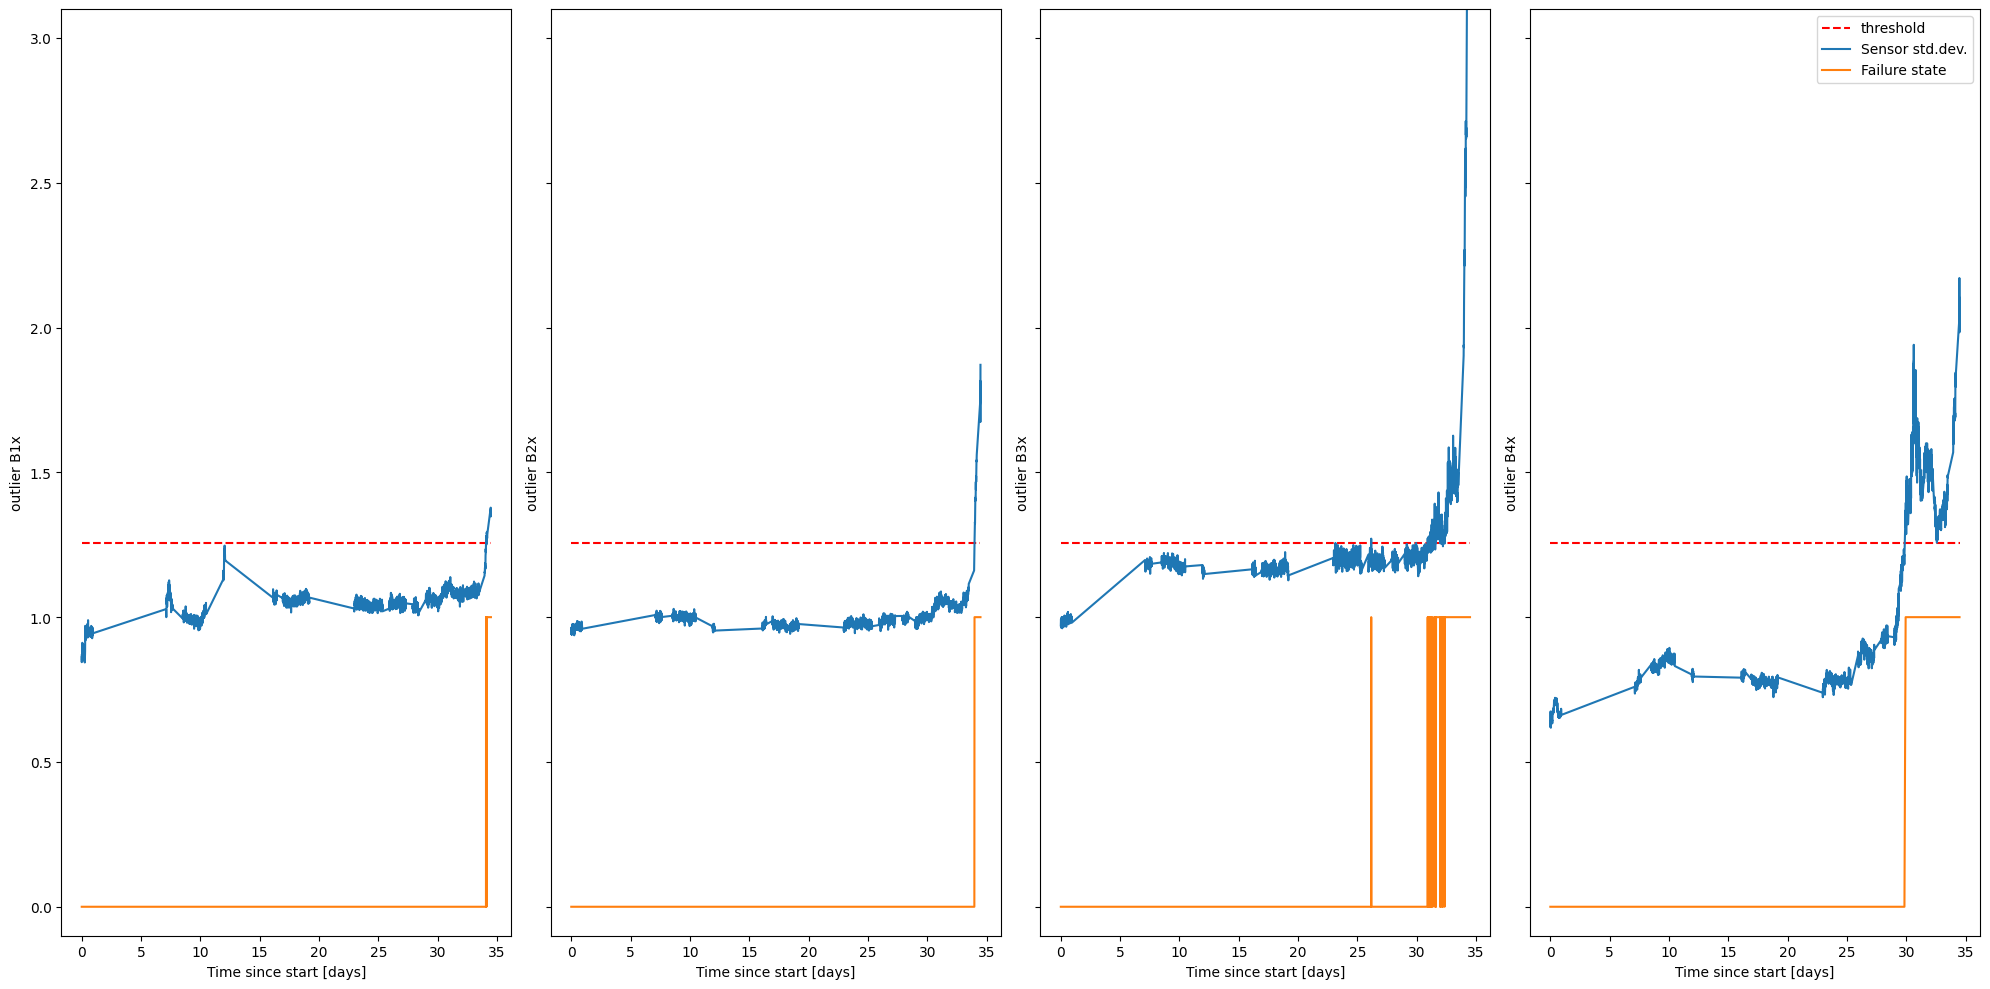

In [14]:
#trực quan hóa độ lệch chuẩn của dữ liệu cảm biến theo thời gian và làm nổi bật các giai đoạn mà độ lệch chuẩn vượt quá một ngưỡng được xác định trước
#chỉ ra trạng thái tiềm ẩn của sự cố.
def plot_stddev_outlier(df):
    print("Experiment duration [days]", df.time.iloc[-1] / (3600 * 24))
    fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
    x = df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
    for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
        stddev = df.groupby("measurement_id")[sensor].apply(
            lambda x: ((x - training_mean) / training_std).std(ddof=0)
        )
        outlier = stddev > stddev_threshold
        ax.hlines(
            stddev_threshold,
            x.iloc[0],
            x.iloc[-1],
            linestyles="dashed",
            color="red",
            label="threshold",
        )
        ax.plot(x, stddev, label="Sensor std.dev.")
        ax.plot(x, outlier, label="Failure state")

        ind = np.where(outlier.values == 1)[0][:3]
        print(f"Sensor {sensor} first three outliers at [days]: {x.values[ind]}")
        ax.set_ylim(-0.1, 3.1)
        ax.set_ylabel(f"outlier {sensor}")
        ax.set_xlabel("Time since start [days]")

    return fig, axes


plot_stddev_outlier(raw_data_set_no_1)
plt.tight_layout()
plt.legend()
plt.show()

sensor 4 reliably being in a detected outlier state before 30 days, that is 5 days before experiment end. For sensor 3 we might have two false positives after 23.1 and 26.1 days, but after 30.9 days we get what we believe are true positives.

100%|██████████| 984/984 [00:25<00:00, 37.95it/s]


Experiment duration [days] 6.826400740162036
Sensor B1x first three outliers at [days]: [4.86805556 4.875      4.88194444]
Sensor B2x first three outliers at [days]: [6.29166667 6.30555556 6.33333333]
Sensor B3x first three outliers at [days]: [6.27083333 6.27777778 6.28472222]
Sensor B4x first three outliers at [days]: [6.72916667 6.73611111 6.74305556]


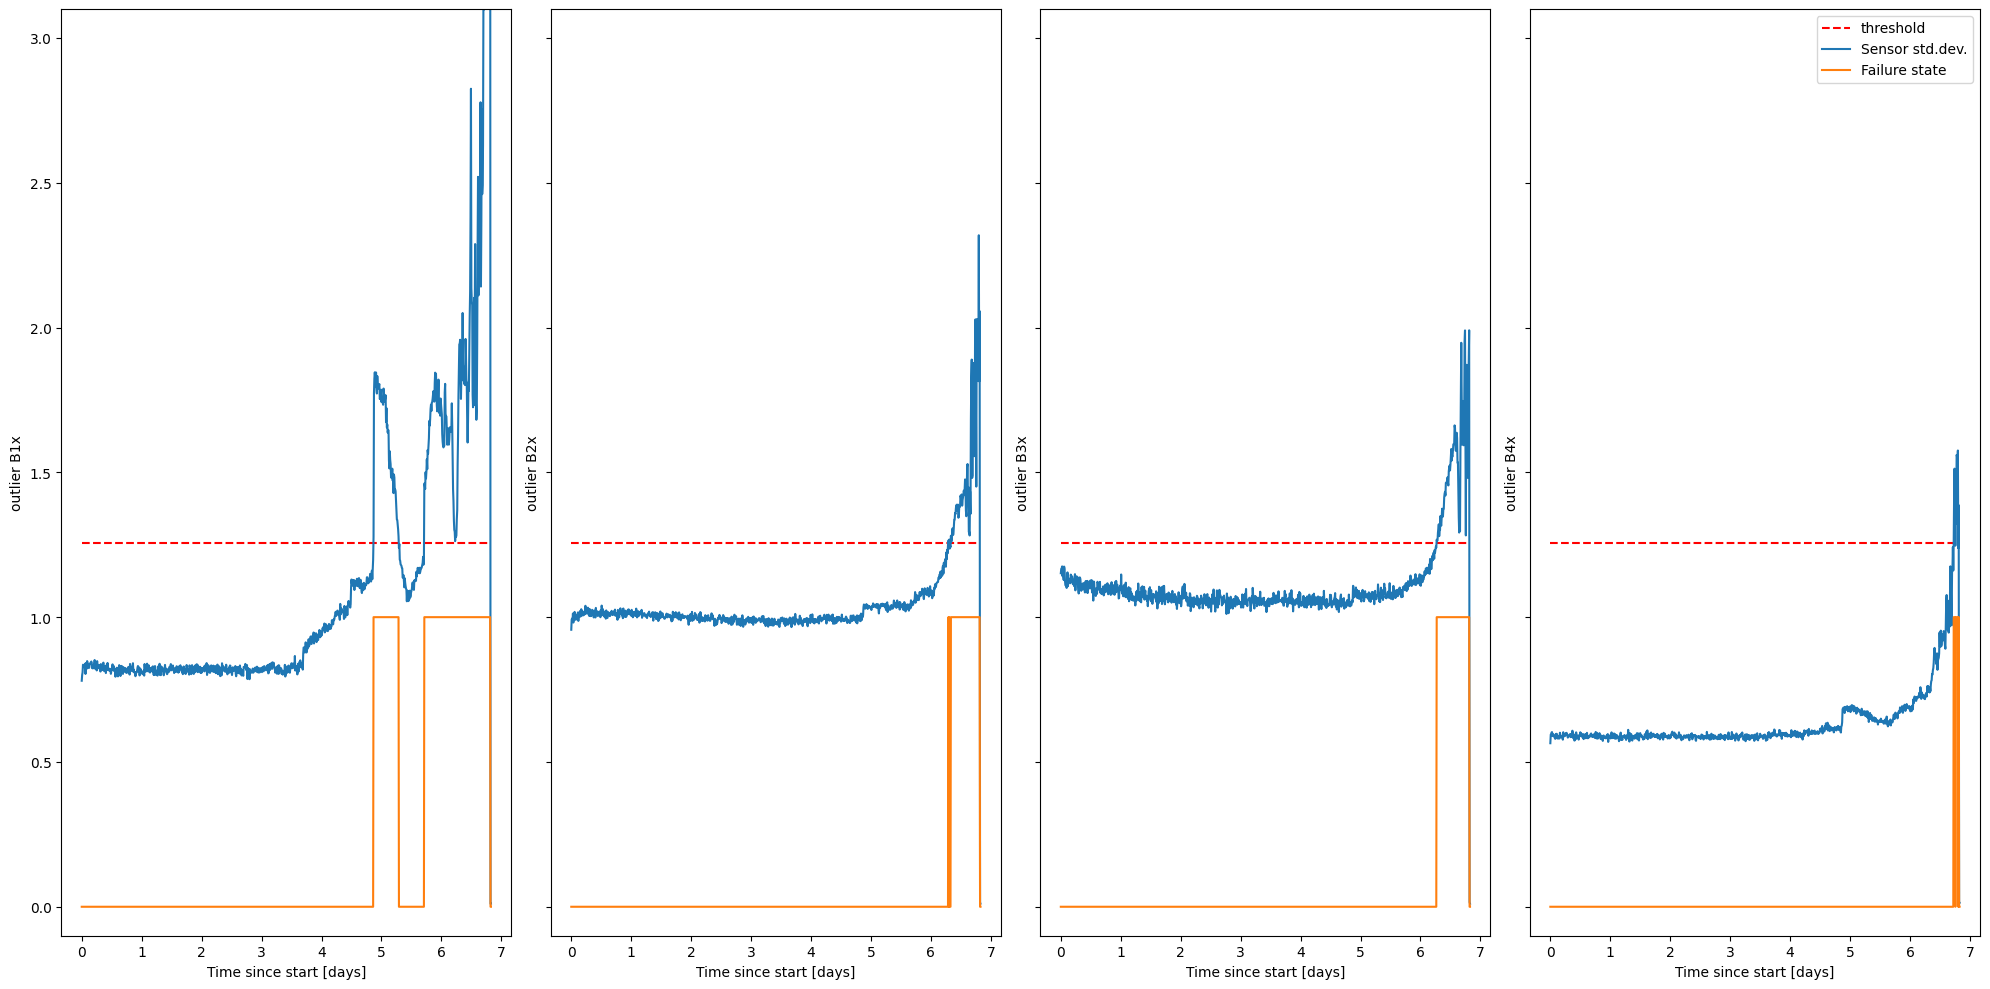

In [59]:
plot_stddev_outlier(read_dataset(set_no_2))
plt.tight_layout()
plt.legend()
plt.show()